## 1. Загрузка и обработка данных

In [804]:
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [499]:
import pandas as pd
data = pd.read_csv('/Users/valerialogacheva/Desktop/Skillfactory1/Skillfactory1/My_course/EDA/ds_salaries.csv')

In [500]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [501]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Вывод: в датасете 607 записей (без пропущенных значений).

1. Проверим датасет на наличие дубликатов, и при необходимости удалим их:

In [503]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


Вывод: в данных нет дупликатов. 

2. Заменим названия стран с кодового на полное название для удобства. 

In [504]:
import country_converter
cc = country_converter.CountryConverter()
data['company_location'] = cc.convert(data['company_location'], to='name_short')
data['employee_residence'] = cc.convert(data['employee_residence'], to='name_short')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L


3. Удалим столбцы salary и salary_currency и оставим только salary_in_usd.

In [505]:
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

4. Выведем категориальные признаки.

In [506]:

print("Категориальные признаки:")
categorical_cols = data.describe(include = 'object')
print(categorical_cols)

Категориальные признаки:
       experience_level employment_type       job_title employee_residence  \
count               565             565             565                565   
unique                4               4              50                 57   
top                  SE              FT  Data Scientist      United States   
freq                243             546             130                295   

       company_location company_size  
count               565          565  
unique               50            3  
top       United States            M  
freq                318          290  


5. Выведем количественные признаки:

In [507]:
print("Количественные признаки:")
numerical_cols = data.describe()
print(numerical_cols)

Количественные признаки:
         work_year  salary_in_usd  remote_ratio
count   565.000000     565.000000    565.000000
mean   2021.364602  110610.343363     69.911504
std       0.698138   72280.702792     40.900666
min    2020.000000    2859.000000      0.000000
25%    2021.000000   60757.000000     50.000000
50%    2021.000000  100000.000000    100.000000
75%    2022.000000  150000.000000    100.000000
max    2022.000000  600000.000000    100.000000


6. Убедимся, что все признаки количественные:

In [508]:
print(data.loc[:,["work_year", "salary_in_usd", "remote_ratio"]].nunique())


work_year          3
salary_in_usd    369
remote_ratio       3
dtype: int64


Вывод: work_year и remote_ratio явлаются категориальными признаками, они имеют по 3 уникальных значения. Выведем эти значения:

In [509]:
print(data["work_year"].unique())
print(data["remote_ratio"].unique())

[2020 2021 2022]
[  0  50 100]


## 2. Разведывательный анализ данных (визуальный и статистический анализ данных)

#### 1. Посмотрим на распределение зарплат среди всех специалистов датасета. 

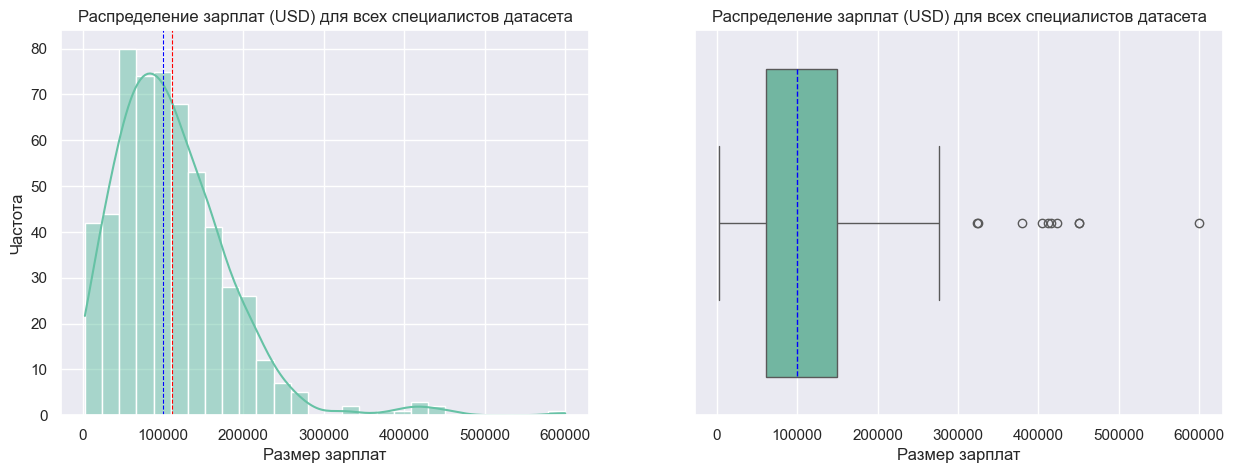

In [510]:
#визуализируем распределение
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплат', ylabel='Частота')
axes[0].set_title('Распределение зарплат (USD) для всех специалистов датасета')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
axes[0].axvline(data['salary_in_usd'].median(), color='blue', linestyle='--', linewidth=0.8)


sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "blue", "linestyle": '--'})
axes[1].set(xlabel='Размер зарплат')
axes[1].set_title('Распределение зарплат (USD) для всех специалистов датасета')

plt.show()

In [511]:
#выведем статистические показатели
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер зарплат в USD']
data_agg

,Размер зарплат в USD
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


Несмотря на выбросы и большой разброс показателей в данных, распределение зарплат похоже на нормальное. Медиана и среднее значение близки и находятся рядом с центром распределения. На выбросы похожи самые высокие показатели зарплат. Один показатель в 600,000$ находится особенно далеко вправо — следующий ближайший показатель находится на отметке в примерно 450,000$. 

Воспользуемся статистическим тестом Шапиро-Уилка, чтобы оценить нормальность распределения всех з/п датасета (при уровне значимости alpha = 0.05). 

In [512]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))


# функция для определения нормальности
def decision_normality(p):
    print(f'p-value = {p}')
    if p <= alpha:
        print(f'p-значение меньше, чем заданный уровень значимости {alpha}. Распределение отлично от нормального.')
    else:
        print(f'p-значение больше, чем заданный уровень значимости {alpha}. Распределение является нормальным.')


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print(f'p-value = {p}')
    if p <= alpha:
        print(f'p-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу в пользу альтернативной.')
    else:
        print(f'p-значение больше, чем заданный уровень значимости {alpha}. У нас нет оснований отвергнуть нулевую гипотезу.')
      

Уровень значимости alpha = 0.05


In [513]:
result = stats.shapiro(data['salary_in_usd'])
print(result[1
             ])
decision_normality(result[1])

1.3631649566598917e-19
p-value = 1.3631649566598917e-19
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Вывод: распределение зарплат не является нормальным. 

#### 2. Посмотрим на изменение распределения всех з/п датасета во времени с 2020 по 2022 год. 

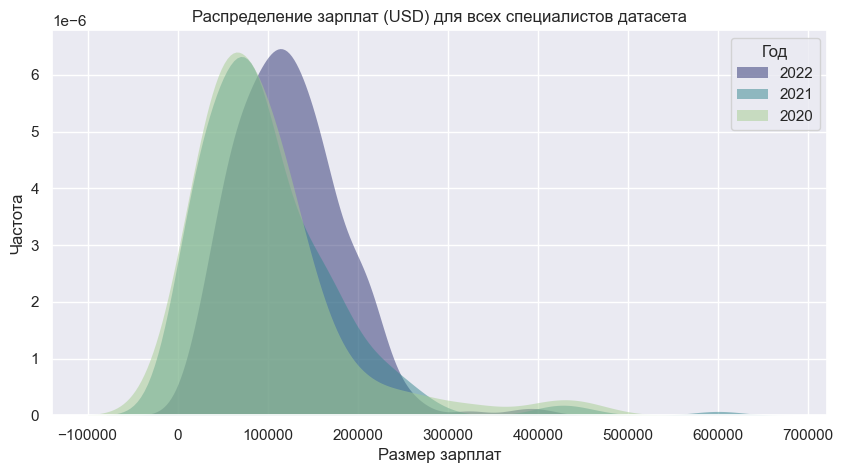

In [841]:
#визуализируем изменения 
plt.figure(figsize=(10, 5))
ax = sns.kdeplot(
   data=data, x="salary_in_usd", hue="work_year",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

ax.set_title('Распределение зарплат (USD) для всех специалистов датасета')
ax.set(xlabel='Размер зарплат', ylabel='Частота')
ax.legend(title = 'Год', labels = ['2022', '2021', '2020'])


In [515]:
#выведем статистические показатели 
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
data_agg

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


Вывод: в 2020 и 2021 году зарплаты почти не изменялись, но в 2022 году произошло увеличение зарплат в среднем примерно на 50,000 USD. Посмотрим, является ли разница между з/п 2021 и 2022 годов статистически значимой. 

In [516]:
# значения страховых выплат
salary_2020 = data.loc[data['work_year']== 2020, 'salary_in_usd']
salary_2021 = data.loc[data['work_year']== 2021, 'salary_in_usd']
salary_2022 = data.loc[data['work_year']== 2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка для определения нормальности распределения
print('Для 2020:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Для 2020:
p-value = 3.4662623882297794e-09
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для 2021:
p-value = 6.528356516130856e-15
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для 2022:
p-value = 2.9991630867698404e-07
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Все три распределения отличны от нормального, группы независимы. Воспользуемся тестом Краскела-Уоллиса, чтобы определить, является ли разница распределений статистически значимой.

Нулевая гипотеза: между распределениями нет статистически значимой разницы.
Альтернативная гипотеза: Разница между распределениями статистически важна.

In [517]:
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: разница между распределениями з/п в 2020, 2021 и 2022 годах статистически важна. 


Поскольку мне интересно, увеличилась ли з/п дата сайентистов в 2022г, а не только есть ли статистически значимая разница между тремя выборками, я воспользуюсь непараметрическим тестом Манна-Уитни для двух пар выборок (2020 и 2021; 2021 и 2022).

2020-2021
Нулевая гипотеза: распределения з/п в 2020 и 2021 годах одинаковы.
Альтернативная гипотеза: распределения з/п в 2020 и 2021 годах неодинаковы (двусторонняя гипотеза).

2021-2022:
Нулевая гипотеза: распределения з/п в 2021 и 2022 годах одинаковы.
Альтернативная гипотеза: в 2022 году з/п увеличились по сравнению с 2021 (левосторонняя гипотеза).

In [518]:
_, p = stats.mannwhitneyu(salary_2020, salary_2021)
print("Для 2020-2021:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
print()
print()


_, p = stats.mannwhitneyu(salary_2021, salary_2022, alternative = 'less')
print("Для 2021-2022:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Для 2020-2021:
p-value = 0.498
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Для 2021-2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: в 2022 году по сравнению с 2021 з/п дата сайентистов увеличились. С 2020 по 2021 год статистически важных изменений нет.  

#### 3. Ответим на вопрос HR–агенства о том, наблюдается ли ежегодный рост з/п у специалистов Data Scientist в период с 2020 по 2022 год. 

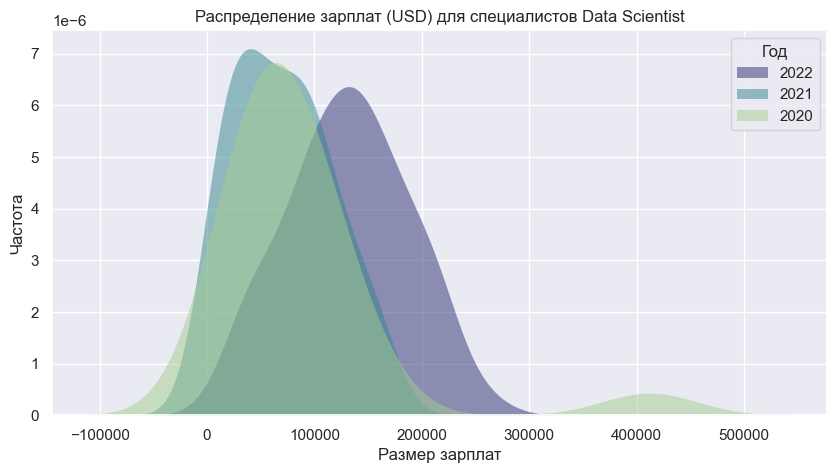

In [519]:
#визуализируем распределение
mask = data[data['job_title'] == 'Data Scientist']
plt.figure(figsize=(10, 5))
ax = sns.kdeplot(
   data=mask, x="salary_in_usd", hue="work_year",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

ax.set_title('Распределение зарплат (USD) для специалистов Data Scientist')
ax.set(xlabel='Размер зарплат', ylabel='Частота')
ax.legend(title = 'Год', labels = ['2022', '2021', '2020'])


На графике видно, что за исключением высоких заработных плат выходящих за пределы стандартного разброса в 2020 году, зарплаты в 2020 и 2021 году практически одинаковые. А вот в 2022 году заметно увеличение зарплат. Проверим эти наблюдения.

In [520]:
mask_2020 = data[(data['job_title'] == "Data Scientist") & (data['work_year'] == 2020)]
mask_2021 = data[(data['job_title'] == "Data Scientist") & (data['work_year'] == 2021)]
mask_2022 = data[(data['job_title'] == "Data Scientist") & (data['work_year'] == 2022)]

ds_salary_2020 = mask_2020['salary_in_usd']
ds_salary_2021 = mask_2021['salary_in_usd']
ds_salary_2022 = mask_2022['salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для 2020:')
result = stats.shapiro(ds_salary_2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(ds_salary_2021)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(ds_salary_2022)
decision_normality(result[1])

Для 2020:
p-value = 1.7172915249830112e-06
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для 2021:
p-value = 0.1072399914264679
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для 2022:
p-value = 0.6761580109596252
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


Воспользуемся непараметрическим тестом Манна-Уитни для 2020 и 2021 годов (поскольку распределение 2020го года отлично от нормального); и параметрическим тестом двухвыборочного t-критерия для нормально распределенных 2021 и 2022 года. 

2020-2021
Нулевая гипотеза: распределения з/п в 2020 и 2021 годах одинаковы.
Альтернативная гипотеза: в 2021 году з/п увеличились по сравнению с 2020 (левосторонняя гипотеза)

2021-2022:
Нулевая гипотеза: распределения з/п в 2021 и 2022 годах одинаковы.
Альтернативная гипотеза: в 2022 году з/п увеличились по сравнению с 2021 (левосторонняя гипотеза).

In [521]:
# Тест Манна-Уитни для сравнения 2020 и 2021 годов.
_, p = stats.mannwhitneyu(ds_salary_2020, ds_salary_2021, alternative = 'less')
print("Для 2020-2021:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
print()
print()

# Двухвыборочный t–критерий для сравнения 2021 и 2022 годов.
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(ds_salary_2021, ds_salary_2022)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')
    
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(ds_salary_2021, ds_salary_2022, alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Для 2020-2021:
p-value = 0.705
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Тест на равенство дисперсий
p-value = 0.264
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: з/п дата сайентистов в 2022 году увеличились по сравнению с 2021 годом. С 2020 по 2021 год роста з/п не произошло. 

#### 4. Посмотрим на распределение зарплат по всем специальностям. 

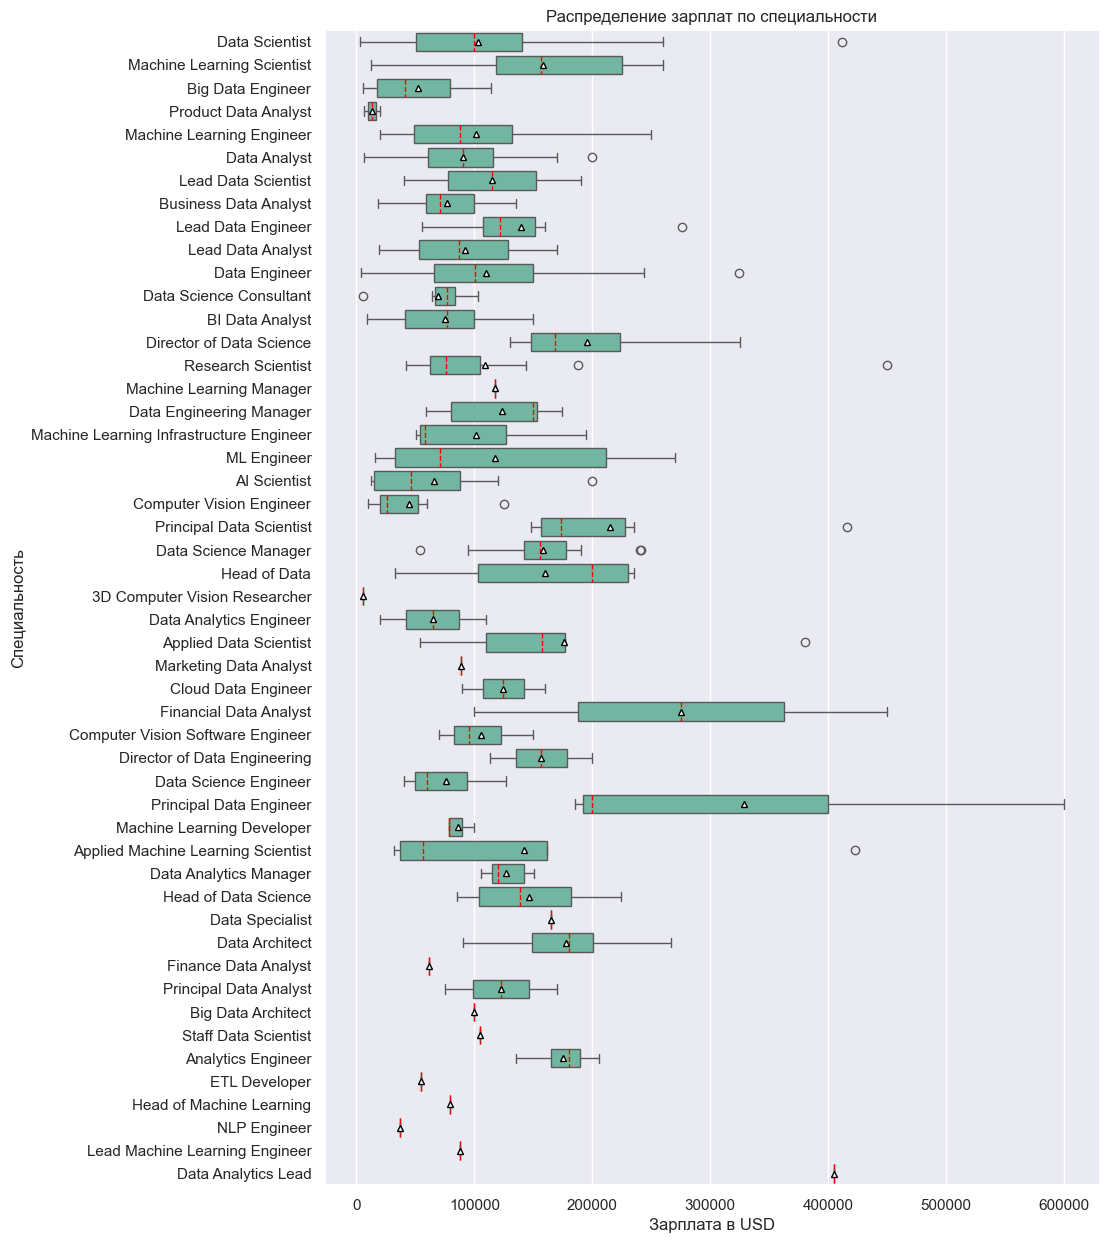

In [522]:
#визуализируем распределение з/п по разным специальностям
fig, ax = plt.subplots(figsize=(10, 15))

sns.boxplot(data, x='salary_in_usd', y='job_title', orient='h', 
            medianprops={"color": "red", "linestyle": '--'}, showmeans = True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, ax=ax)

ax.set(xlabel='Зарплата в USD', ylabel='Специальность')
plt.title('Распределение зарплат по специальности')
plt.show()

Большинство специальностей находятся примерно в одной зарплатной категории: от 50 до 150 или от 100 до 200 тыс USD. Около 10 специальностей имеют з/п, регулярно выходящие за этот лимит, и только 2 профессии, Principal Data Engineer и Financial Data Analyst находятся в значительно высшем зарплатном ранге. Максимальная з/п датасета — з/п на специальности Principal Data Engineer (600 тыс USD). 

#### 5. Посмотрим, отличается ли средняя з/п всех сотрудников датасета от средней з/п в США на 2023 год (примерно 56 тыс. долларов, согласно )

#### 5. Посмотрим на соотношение популярности/распространенности специальности и размера медианной з/п:

In [523]:
result_df = pd.DataFrame({
    'Количество специалистов по специальности': data['job_title'].value_counts(),
    'Медианная з/п (USD)': data.groupby('job_title')['salary_in_usd'].median()
})

result_df = result_df.sort_values(by='Количество специалистов по специальности', ascending=False)
result_df = result_df.reset_index()
result_df.head()

,job_title,Количество специалистов по специальности,Медианная з/п (USD)
0,Data Scientist,130,100000.0
1,Data Engineer,121,100800.0
2,Data Analyst,82,90000.0
3,Machine Learning Engineer,39,87425.0
4,Research Scientist,16,76263.5


In [524]:
result_df.tail()

,job_title,Количество специалистов по специальности,Медианная з/п (USD)
45,ETL Developer,1,54957.0
46,Data Specialist,1,165000.0
47,Data Analytics Lead,1,405000.0
48,Big Data Architect,1,99703.0
49,Staff Data Scientist,1,105000.0


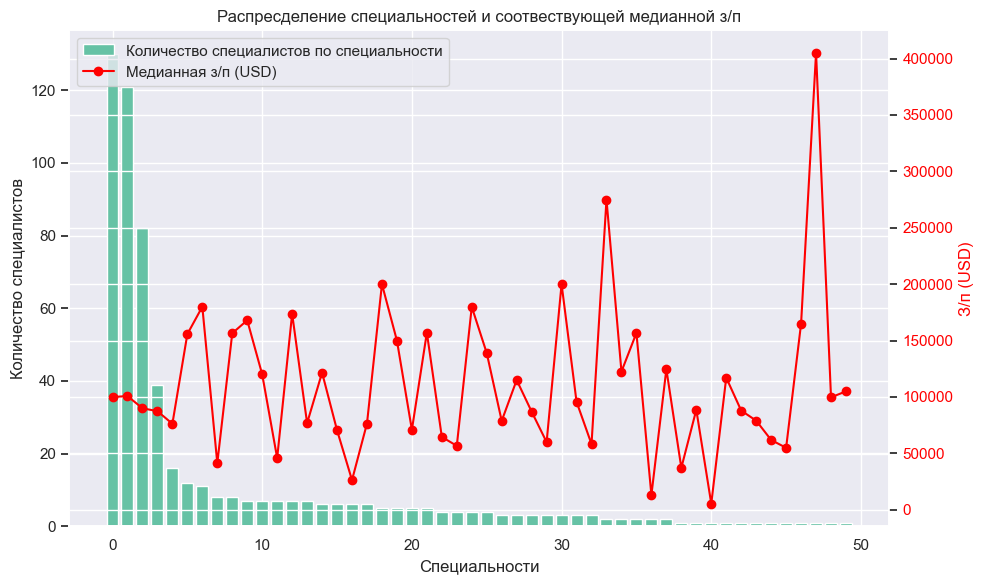

In [525]:
# визуализируем соотношение
fig, ax1 = plt.subplots(figsize=(10, 6))

#создаем диаграму кол-ва специалистов
ax1.bar(result_df.index, result_df['Количество специалистов по специальности'], label='Количество специалистов по специальности')

ax1.set_xlabel('Специальности')
ax1.set_ylabel('Количество специалистов')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0) 


#добавляю на диаграму линию с распределением медианных з/п
ax2 = ax1.twinx()

ax2.plot(result_df.index, result_df['Медианная з/п (USD)'], marker='o', color='red', linestyle='-', label='Медианная з/п (USD)')

ax2.set_ylabel('З/п (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Распресделение специальностей и соотвествующей медианной з/п')

plt.tight_layout()
plt.show()


Проверим с помощью метода Спирмана, существует ли корреляция между распространенностью специальности и размером з/п.

In [526]:
result_df.corr(numeric_only=True, method = 'spearman')

,Количество специалистов по специальности,Медианная з/п (USD)
Количество специалистов по специальности,1.000000,0.080152
Медианная з/п (USD),0.080152,1.000000


Вывод: хотя несколько самых высокох показателей медианной з/п находятся среди самых наименее распространенных должностей, коеффициент обратной зависимости между этими показателями слишком слаб, чтобы быть значимим (0.07 по Спирману). Мы можем сказать, что зависимости между распространенностью должности и размером медианной з/п нет. 

#### 6. Ответим на вопрос  HR-агенства о том, как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году.

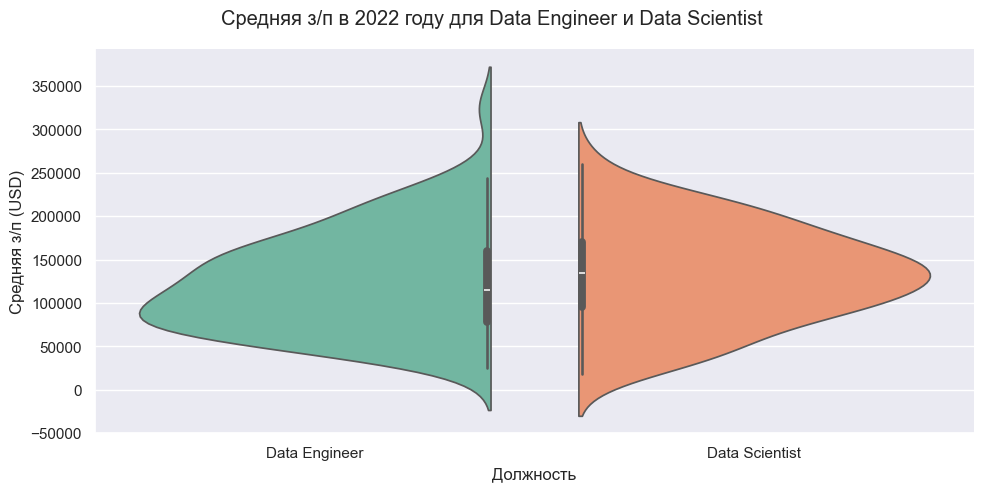

In [527]:
#визуализируем соотношение 

mask = data[((data['job_title'] == "Data Engineer") | (data['job_title'] == 'Data Scientist')) & (data['work_year'] == 2022)]

ax = sns.catplot(data=mask, x="job_title", y="salary_in_usd", hue="job_title", kind="violin", split=True, height=5, aspect=2)
plt.subplots_adjust(top=0.90) 
plt.suptitle('Средняя з/п в 2022 году для Data Engineer и Data Scientist')
ax.set_xlabels('Должность')
ax.set_ylabels('Средняя з/п (USD)')
plt.show() 

In [528]:
#выведем сататистические показатели
data_agg = mask.groupby('job_title')['salary_in_usd'].describe().round(2)
data_agg

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


На графике видно, что средний размер з/п у Data Scientists больше чем у Data Engineer, хотя среди з/п Data Engineer присутствуют более высокие показатели з/п. Посмотрим, явлается ли разница средних з/п статистически значимой.

Нулевая гипотеза: Размер з/п Data Scientists не отличается з/п Data Engineer.
Альтернативная гипотеза: Средний размер з/п Data Scientists отличается от з/п Data Engineer.

In [529]:
#проверим нормальность распределения 

mask_ds = data[(data['job_title'] == "Data Scientist") l (data['work_year'] == 2022)]
ds_salary_2022 = mask_ds['salary_in_usd']

mask_de = data[(data['job_title'] == "Data Engineer") & (data['work_year'] == 2022)]
de_salary_2022 = mask_de['salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для Data Engineer:')
result = stats.shapiro(de_salary_2022)
decision_normality(result[1])

print('Для Data Scientists:')
result = stats.shapiro(ds_salary_2022)
decision_normality(result[1])

Для Data Engineer:
p-value = 0.00659553799778223
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для Data Scientists:
p-value = 0.6761580109596252
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


Поскольку для специальности Data Engineer распределение отлично от нормального, воспользуемся непараметрическим тестом для двух независимых групп: U–критерий Манна-Уитни.

In [530]:
_, p = stats.mannwhitneyu(de_salary_2022, de_salary_2022)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: между распределением з/п Data Scientists и Data Engineers в 2022 году нет статистически значимой разницы. 

#### 7. Посмотрим, насколько з/п зависит от опыта специалиста. 

Для начала посмотрим, сколько специалистов в датасете приходится ня каждую категорию опыта.

In [531]:
data['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

Большинство специалистов датасета имеют опыт работы Senior (SE), далее 208 специалистов уровня Middle (MI), 88 на Entry (EN), и 26 человек на позиции Executive (EX).

Text(0.5, 1.0, 'З/п и опыт работы')

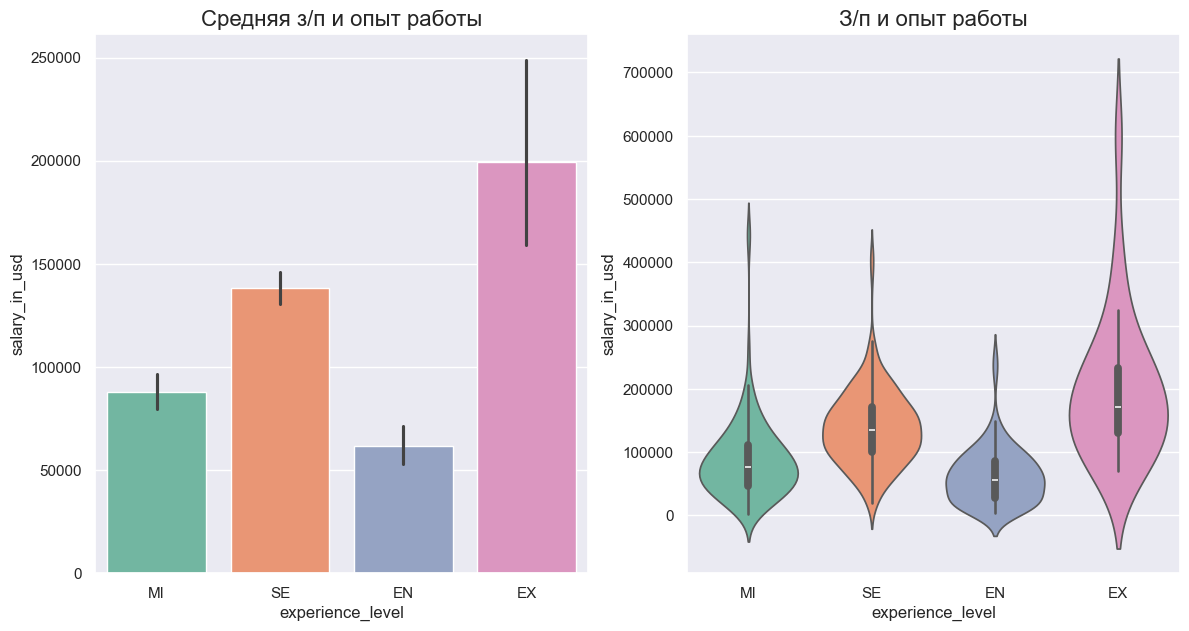

In [532]:
#визуализируем распределение 

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(data, x='experience_level', y='salary_in_usd', hue='experience_level')
ax.set_title('Средняя з/п и опыт работы', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data, x='experience_level', y='salary_in_usd', hue='experience_level')
ax.set_title('З/п и опыт работы', fontdict={'fontsize': 16})

Как и ожидалось, с опытом работы растет и размер средней з/п. Так, на начальном уровне (Entry) размер средней з/п составляет около 6 тыс USD, a на уровне Executive средняя з/п составлаят около 200 тыс. USD. Любопытным кажется более высокий показатель максимальной з/п на уровне Middle по сравнению с уровнем Senior на скрипичной диаграмме справа. Выведем основные статистические показатели и проверим статистическую значимость разницы з/п между этими категориями опыта. 

In [533]:
#выведем сататистические показатели
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
data_agg

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


In [534]:
# проверим нормальность распределения зарплат людей с опытом Middle и Senior

# значения страховых выплат
salary_mi = data.loc[data['experience_level']== 'MI', 'salary_in_usd']
salary_se = data.loc[data['experience_level']== 'SE', 'salary_in_usd']


# проводим тест Шапиро-Уилка для определения нормальности распределения
print('Для Middle:')
result = stats.shapiro(salary_mi)
decision_normality(result[1])

print('Для Senior:')
result = stats.shapiro(salary_se)
decision_normality(result[1])



Для Middle:
p-value = 7.778513195290685e-16
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для Senior:
p-value = 1.0857901600047626e-07
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Оба распределения отличны от нормального. Воспользуемся тестом Манна-Уитни.

Нулевая гипотеза: между распределением з/п специалистов с опытом Middle и Senior нет статистичиски значимой разницы. 
Альтернативная гипотеза. З/п специалистов с опытом Senior больше з/п специалистов с опытом Middle. 

In [535]:
# Тест Манна-Уитни для сравнения 2020 и 2021 годов.
_, p = stats.mannwhitneyu(salary_mi, salary_se, alternative = 'less')
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: з/п специалистов с опытом Senior больше з/п специалистов с опытом Middle. 

#### 8. Посмотрим, как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров и как соотносятся признаки размера компании, опыта работы и размера з/п.

In [609]:
#выведем размеры з/п в компаниях разных размеров. 
company_size_salary_df = pd.DataFrame({
    'Средняя з/п': data.groupby('company_size')['salary_in_usd'].mean(),
    'Максимальная з/п': data.groupby('company_size')['salary_in_usd'].max(),
    'Минимальная з/п': data.groupby('company_size')['salary_in_usd'].min()
})
company_size_salary_df.reset_index(inplace=True)
company_size_salary_df


,company_size,Средняя з/п,Максимальная з/п,Минимальная з/п
0,L,118213.880829,600000,5882
1,M,114807.079310,450000,4000
2,S,77872.097561,416000,2859


Text(0, 0.5, 'Средняя з/п (USD)')

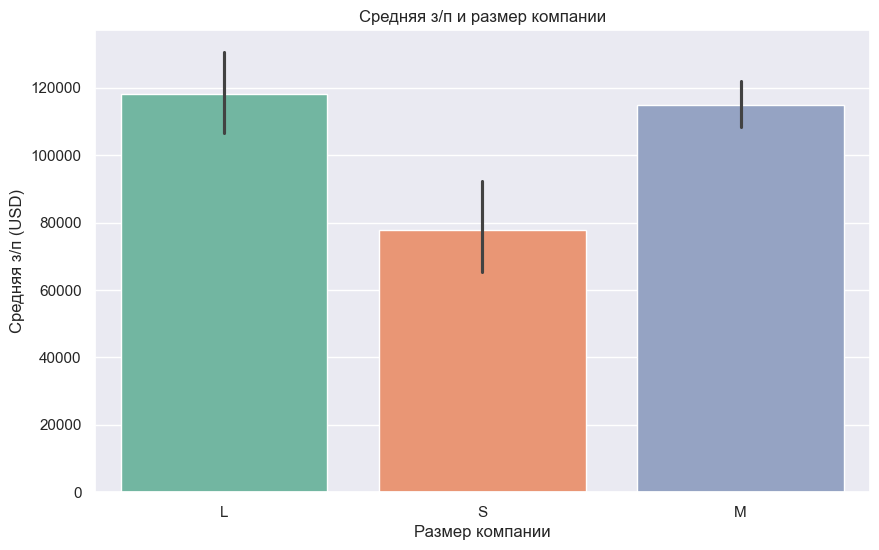

In [698]:
#визуализируем распределение средних зарплат
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1 = sns.barplot(data, x='company_size', y='salary_in_usd', hue='company_size')
ax1.set_title('Средняя з/п и размер компании') 
ax1.set_xlabel('Размер компании')
ax1.set_ylabel('Средняя з/п (USD)')

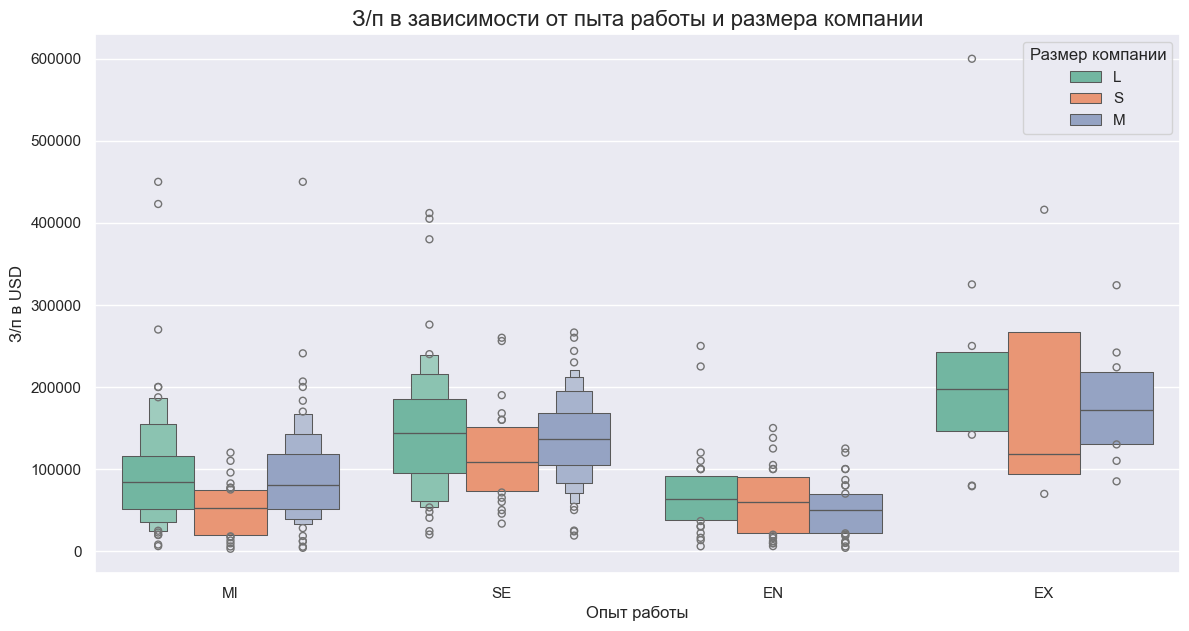

In [619]:
# визуализируем данные, добавим разрез по признаку опыта работы сотрудника
plt.figure(figsize=(14, 7))
ax = sns.boxenplot(data, x='experience_level', y='salary_in_usd', hue='company_size')
ax.set_title('З/п в зависимости от пыта работы и размера компании', fontdict={'fontsize': 16})
ax.set_xlabel('Опыт работы')
ax.set_ylabel('З/п в USD')
ax.legend(title='Размер компании')



Для специалистов с опытом работы Middle и Senior выгоднее всего будет пойти на работу в большую компанию, где з/п увеличивается с опытом работы, хотя значительной разницы между зарплатами специалистов этих двух уровней не наблюдается (проверим, есть ли статитически значимая разница между этими показателами ниже). 

А вот для специалистов с самым начальным уровнем Entry и специалистов уровня Executive, хотя сямые высокие максимальные з/п все еще представлены большими компаниями, медианная з/п может быть примерно одинакова в компаниях всех размеров (Entry), или может быть ниже в средних компаниях, чем в маленьких (Executive), а максимальная з/п может быть в маленькой компании выше, чем в средней (Executive). Для цпециалистов уровня Entry проверим, есть ли статистически значимая разница в размере з/п в компаниях разных размеров. 

1) Для специалистов Middle и Senior, есть ли статистически значимая разница между размером з/п в больших и средних компаниях?

2) Для специалистов Middle и Senior, есть ли статистически значимая разница между размером з/п в больших и маленьких компаниях?

3) Для специалиста уровня Entry, есть ли статистически значимая разница между размером з/п в компаниях разных размеров?

4) Для специалистов уровня Executive, есть ли статистически значимая разница между размером з/п в больших и средних компаниях.

1) Посмотрим, есть ли статистически значимая разница между размером з/п в больших и средних компаниях для специалистов Middle и Senior.

Нулевая гипотеза: для специалистов уровня Middle и Senior з/п в средних компаниях равна з/п в больших компаниях.
Альтернативная гипотеза: для специалистов уровня Middle и Senior з/п в средних компаниях отличается от з/п в больших.


In [684]:

middle_senior_l = data[((data['experience_level'] == 'MI') | (data['experience_level'] == 'SE')) & (data['company_size'] == 'L')]
middle_senior_m = data[((data['experience_level'] == 'MI') | (data['experience_level'] == 'SE')) & (data['company_size'] == 'M')]


# проводим тест Шапиро-Уилка для определения нормальности распределения
print('Для больших компаний:')
result = stats.shapiro(middle_senior_l['salary_in_usd'])
decision_normality(result[1])

print('Для средних компаний:')
result = stats.shapiro(middle_senior_m['salary_in_usd'])
decision_normality(result[1])
print()
print()
# Распределение отлично от нормального в обоих случаях. Воспользуемся тестом Манна-Уитни. 


# Тест Манна-Уитни для сравнения з/п в средних и больших компаниях:
_, p = stats.mannwhitneyu(middle_senior_m['salary_in_usd'], middle_senior_l['salary_in_usd'])
print("Для специалистов уровня Middle и Senior в больших и средних компаниях:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Для больших компаний:
p-value = 2.2844041935865533e-10
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для средних компаний:
p-value = 1.2475368293962674e-06
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Для специалистов уровня Middle и Senior в больших и средних компаниях:
p-value = 0.206
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: для специалистов уровня Senior и Middle нет статистически значимой разницы в размере з/п в компаниях среднего и большого размера. 

2) Посмотрим, есть ли разница в з/п для специалистов уровня Senior и Middle в компаниях большого и маленького размера.

Нулевая гипотеза: в компаниях маленького размера з/п равна или больше з/п в больших компаниях.
Альтернативная гипотеза: в компаниях маленького размера з/п меньше в больших компаниях.

In [685]:
middle_senior_l = data[((data['experience_level'] == 'MI') | (data['experience_level'] == 'SE')) & (data['company_size'] == 'L')]
middle_senior_s = data[((data['experience_level'] == 'MI') | (data['experience_level'] == 'SE')) & (data['company_size'] == 'S')]


# проводим тест Шапиро-Уилка для определения нормальности распределения

print('Для средних компаний:')
result = stats.shapiro(middle_senior_s['salary_in_usd'])
decision_normality(result[1]) #респределение отлично от нормального
print()
print()

# Тест Манна-Уитни.
_, p = stats.mannwhitneyu(middle_senior_s['salary_in_usd'], middle_senior_l['salary_in_usd'], alternative='less')
print("Для специалистов уровня Middle и Senior в больших и средних компаниях:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



Для средних компаний:
p-value = 0.0003093800332862884
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Для специалистов уровня Middle и Senior в больших и средних компаниях:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: в маленьких компаниях з/п специалистов уровня Senior и Middle меньше, чем в больших и средних компаниях. 

3) Посмотрим, есть ли статистически значимая разница между размером з/п в компаниях разных размеров для специалиста уровня Entry.

Нулевая гипотеза: з/п для специалиста уровня Entry в компаниях разных размеров равны.
Альтернативная: для специалистов уровня Entry между размерами з/п в компаниях разных размеров
есть статистически значимая разница.

In [690]:
entry_specialist_s = data[(data['experience_level'] == 'EN') & (data['company_size'] == 'S')]
entry_specialist_m = data[(data['experience_level'] == 'EN') & (data['company_size'] == 'M')]
entry_specialist_l = data[(data['experience_level'] == 'EN') & (data['company_size'] == 'L')]


# проводим тест Шапиро-Уилка для определения нормальности распределения

print('Для маленьких компаний:')
result = stats.shapiro(entry_specialist_s['salary_in_usd'])
decision_normality(result[1]) #нормальное респределение 

print('Для средних компаний:')
result = stats.shapiro(entry_specialist_m['salary_in_usd'])
decision_normality(result[1]) #нормальное респределение 

print('Для больших компаний:')
result = stats.shapiro(entry_specialist_l['salary_in_usd'])
decision_normality(result[1]) #респределение отлично от нормального

print()
print()

#поскольку в последней группе распределение ненормальное, воспользуемся тестом Краскела-Уоллиса

_, p = stats.kruskal(entry_specialist_s['salary_in_usd'], entry_specialist_m['salary_in_usd'], entry_specialist_l['salary_in_usd'])

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))





Для маленьких компаний:
p-value = 0.17366385459899902
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для средних компаний:
p-value = 0.1222735345363617
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для больших компаний:
p-value = 0.00017933989875018597
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


p-value = 0.227
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: з/п для специалиста уровня Entry в компаниях разных размеров равны.

4) Посмотрим, есть ли статистически значимая разница между размером з/п в средних и маленьких компаниях для специалистов уровня Executive:

Нулевая гипотеза: в маленьких компаниях з/п специалиста уровня Executive равна з/п такого специалиста в средних компаниях.
Альтернативная: в маленьких компаниях з/п специалиста уровня Executive отличается от з/п такого специалиста в средних компаниях.

А также есть ли разница между размером з/п в больших и маленьких компаниях для специалистов уровня Executive:

Нулевая гипотеза: в маленьких компаниях з/п специалиста уровня Executive равна з/п такого специалиста в больших компаниях.
Альтернативная: в маленьких компаниях з/п специалиста уровня Executive отличается от з/п такого специалиста в больших компаниях.

In [696]:
executive_s = data[(data['experience_level'] == 'EX') & (data['company_size'] == 'S')]
executive_m = data[(data['experience_level'] == 'EX') & (data['company_size'] == 'M')]
executive_l = data[(data['experience_level'] == 'EX') & (data['company_size'] == 'L')]


# проводим тест Шапиро-Уилка для определения нормальности распределения
print('Для маленьких компаний:')
result = stats.shapiro(executive_s['salary_in_usd'])
decision_normality(result[1]) #нормальное респределение 

print('Для средних компаний:')
result = stats.shapiro(executive_m['salary_in_usd'])
decision_normality(result[1]) #нормальное респределение 

print('Для больших компаний:')
result = stats.shapiro(executive_l['salary_in_usd'])
decision_normality(result[1]) #респределение отлично от нормального
print()
print()

#проведем двухвыборочный t–критерий для нормально распределенных з/п в маленьких и средних компаниях. 

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(executive_s['salary_in_usd'], executive_m['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')
# дисперсии одинаковы
print()
print()


# проводим тест на сравнение средних в группах
print('Тест на равенство средних')
_, p = stats.ttest_ind(executive_s['salary_in_usd'], executive_m['salary_in_usd'], equal_var=True)
print("Для специалистов уровня Executive в средних и маленьких компаниях:")
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
print()
print()

#Для сравнения з/п в маленьких и больших компаниях проведем тест Манна-Уитни, поскольку з/п в больших компаниях не распределена нормально.
# Тест Манна-Уитни для сравнения з/п в средних и больших компаниях:
_, p = stats.mannwhitneyu(executive_s['salary_in_usd'], executive_l['salary_in_usd'])
print("Для специалистов уровня Executive в больших и маленьких компаниях:")
print('p-value = {:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))




Для маленьких компаний:
p-value = 0.24742657600753293
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для средних компаний:
p-value = 0.6710090041160583
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для больших компаний:
p-value = 0.013547434471547604
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Тест на равенство дисперсий
p-value = 0.199
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


Тест на равенство средних
Для специалистов уровня Executive в средних и маленьких компаниях:
p-value = 0.715
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Для специалистов уровня Executive в больших и маленьких компаниях:
p-value = 0.555
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: для специалиста уровня Executive з/п не зависит от размера компании.

Общий вывод: размер компании влияет на з/п только для специалистов уровня Middle и Senior — им платят меньше всего в маленьких компаниях, хотя разницы между з/п в больших и средних компаниях для этих специалистов также нет.

Построим три пайчарта для иллюстрации распределения специалистов с разными опытами работы в компаниях разного размера.

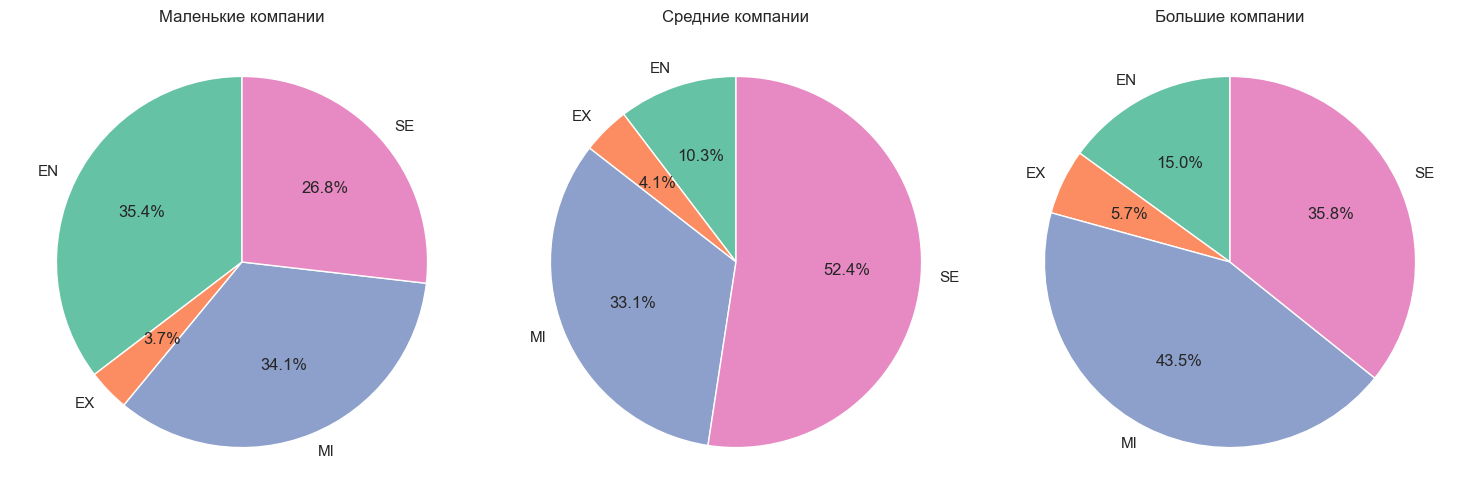

In [818]:

grouped = data.groupby(['company_size', 'experience_level']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sizes_s = grouped.loc['S']
axes[0].pie(sizes_s, labels=sizes_s.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Маленькие компании')

sizes_m = grouped.loc['M']
axes[1].pie(sizes_m, labels=sizes_m.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Средние компании')

sizes_l = grouped.loc['L']
axes[2].pie(sizes_l, labels=sizes_l.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Большие компании')


plt.tight_layout()
plt.show()

Вывод: доля специалистов Executive почти одинаково распределена в компаниях разных размеров (примерно 5%), специалисты с уровнем Middle занимают примерно треть в маленьких и средних компаниях и примерно на 10% больше в больших компаниях. Любопытно, что самое большое кол-во специалистов Senior в средних компаниях (примерно в 2 раза больше, чем в маленьких) — здесь специалисты Senior опыта состявляют больше половины сотрудников. Также интересно, что в маленьких компаниях самый распространенный опыт работы сотрудника — Entry (больше трети сотрудников). Возможно это связано с тем, что у маленьких компаний нет финансовой возможности нанимать специалистов с большим опытом работы.

Ответим на вопрос HR-агенства о том, как распределены з/п специалистов с должностью Data Scientist в компаниях разных размеров. 

In [757]:
data_scientist = data[data['job_title'] == 'Data Scientist']

In [719]:
data_scientist['experience_level'].value_counts()

experience_level
MI    59
SE    49
EN    22
Name: count, dtype: int64

Text(0.5, 1.0, 'Средняя з/п и опыт работы')

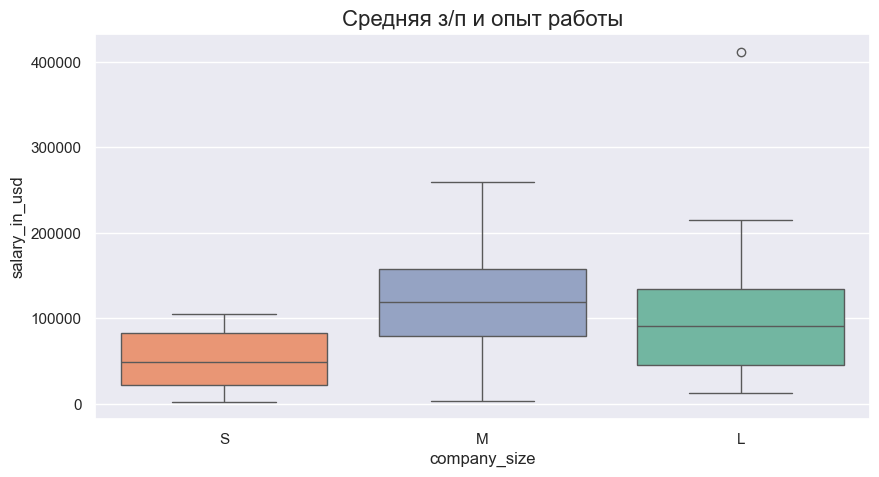

In [734]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data_scientist, x='company_size', y='salary_in_usd', hue='company_size', order=['S', 'M', 'L'])
ax.set_title('Средняя з/п и опыт работы', fontdict={'fontsize': 16})

/var/folders/67/x74mgr8122l6kp90mlcp_vv80000gn/T/ipykernel_6390/167665203.py:28: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



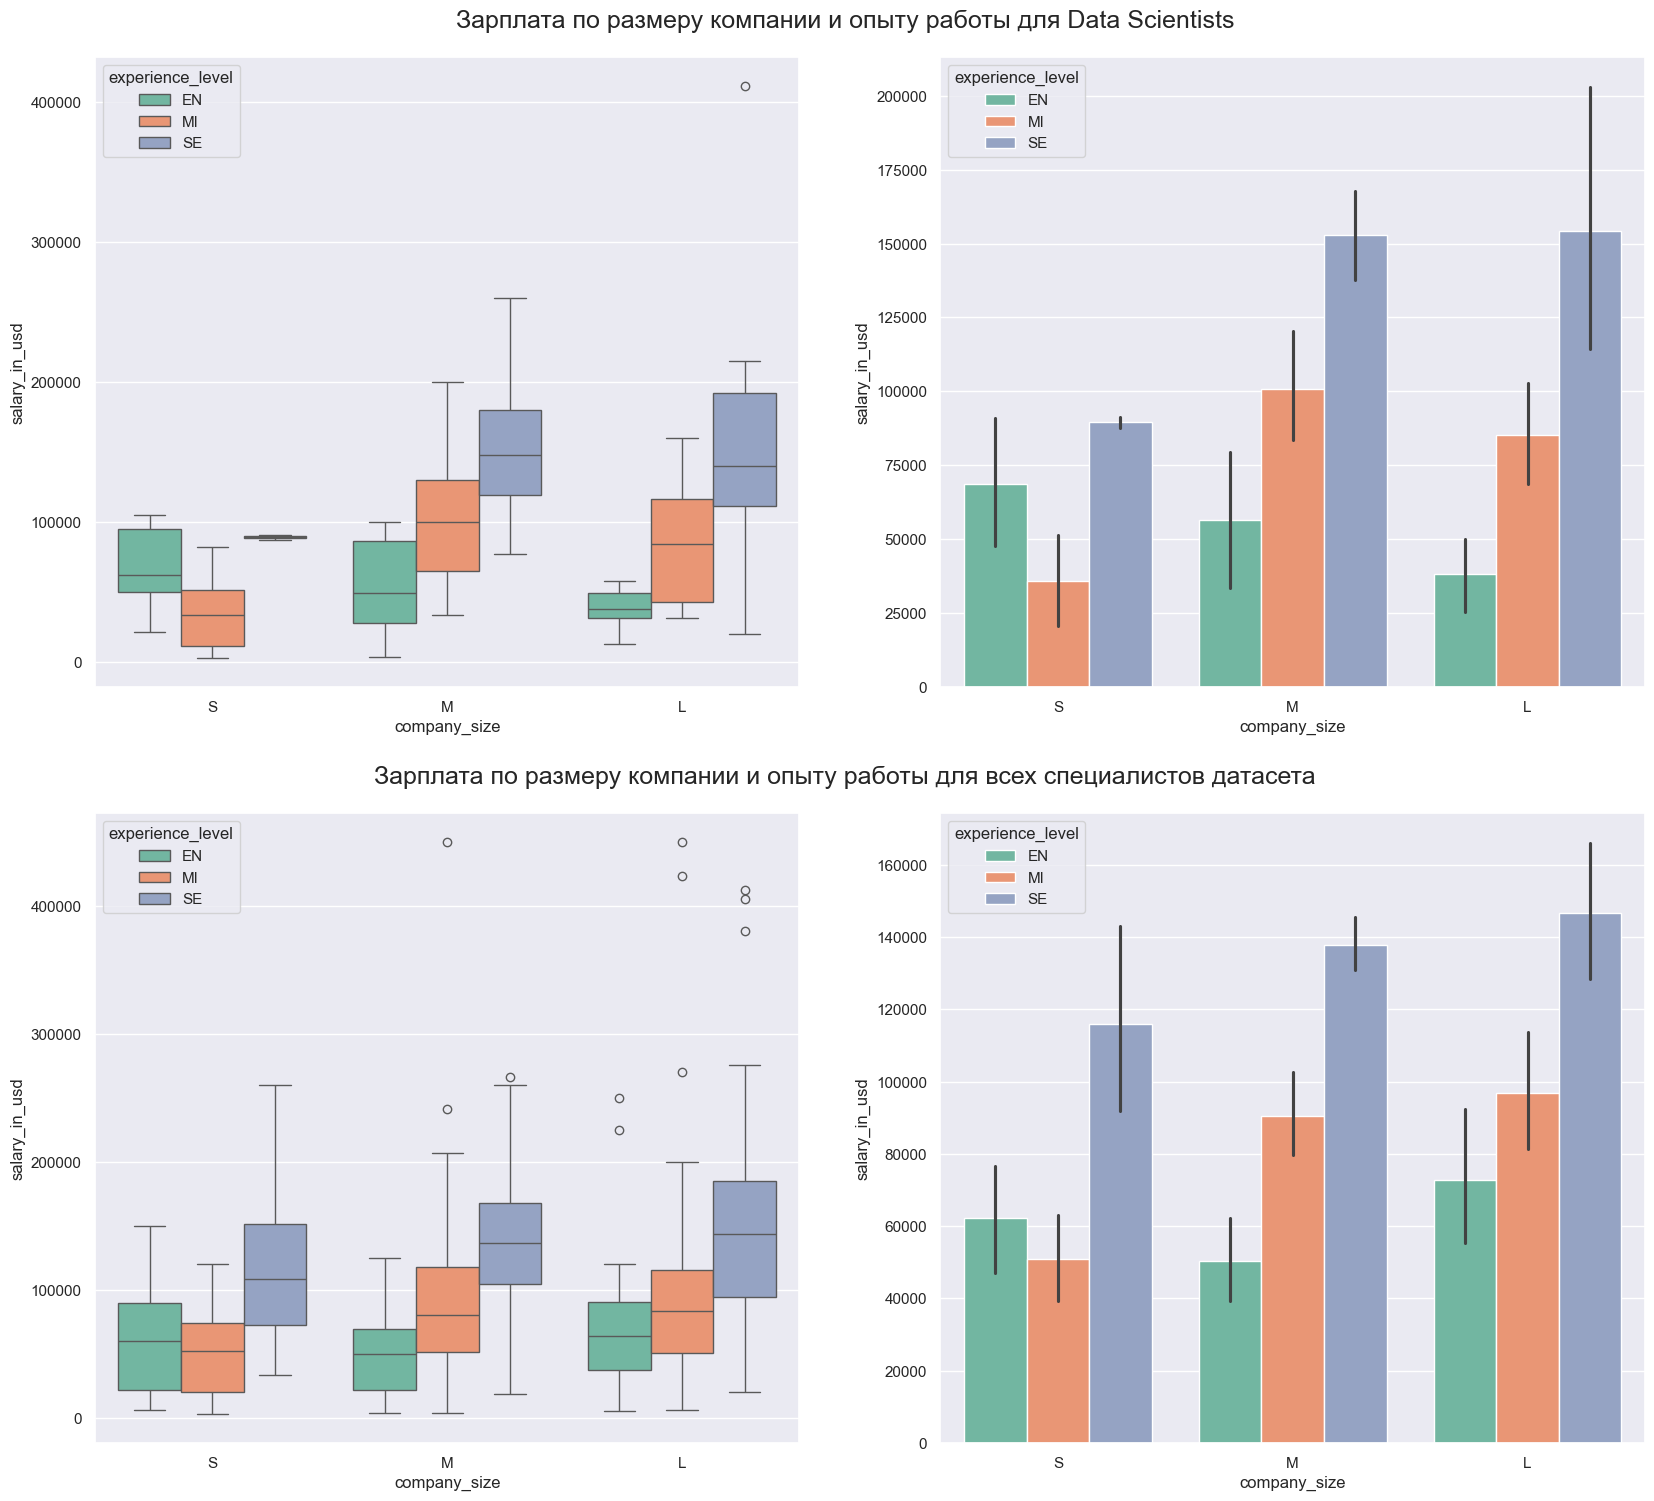

In [746]:
#визуализируем распределение с добавлением разреза по признаку опыта сотрудника
data_no_ex = data[(data['experience_level'] != 'EX')]

experience_order = ['EN', 'MI', 'SE'] 
company_size_order = ['S', 'M', 'L'] 

plt.figure(figsize=(20, 18))

plt.figtext(0.5, 0.9, 'Зарплата по размеру компании и опыту работы для Data Scientists', ha='center', va='center', fontsize=18)d

plt.subplot(2, 2, 1)
ax = sns.boxplot(data_scientist, x='company_size', y='salary_in_usd', hue='experience_level', hue_order=experience_order, order=company_size_order)

plt.subplot(2, 2, 2)
ax = sns.barplot(data_scientist, x='company_size', y='salary_in_usd', hue='experience_level', hue_order=experience_order, order=company_size_order)


plt.figtext(0.5, 0.48, 'Зарплата по размеру компании и опыту работы для всех специалистов датасета', ha='center', va='center', fontsize=18)

plt.subplot(2, 2, 3)
ax = sns.boxplot(data_no_ex, x='company_size', y='salary_in_usd', hue='experience_level', hue_order=experience_order, order=company_size_order)


# Fourth subplot (bottom-right)
plt.subplot(2, 2, 4)
ax = sns.barplot(data_no_ex, x='company_size', y='salary_in_usd', hue='experience_level', hue_order=experience_order, order=company_size_order)

plt.tight_layout(rect=[2, 2, 2, 2])


Похоже, что тенденции зарплат специалистов Data Science одинаковые с тенденциями всех специалистов датасета вцелом. Проверим, существует ли корреляция между этими двумя распределениями з/п. 

In [758]:

#для з/п в целом вновь отфильтруем уровень опыта Executive, т.к. среди дата сайентистов такого опыта нет. 

general_avg_salary = data_no_ex.groupby(['company_size', 'experience_level']).salary_in_usd.mean().reset_index(name='avg_salary_general')
ds_avg_salary = data_scientist.groupby(['company_size', 'experience_level']).salary_in_usd.mean().reset_index(name='avg_salary_ds')


merged_salaries = pd.merge(general_avg_salary, ds_avg_salary, on=['company_size', 'experience_level'], how='inner')


correlation = merged_salaries[['avg_salary_general', 'avg_salary_ds']].corr(method='spearman')

print(merged_salaries)
print(correlation)


  company_size experience_level  avg_salary_general  avg_salary_ds
0            L               EN        72813.241379   38365.000000
1            L               MI        96903.309524   85263.409091
2            L               SE       146702.217391  154132.133333
3            M               EN        50321.800000   56345.111111
4            M               MI        90577.531250  100973.480000
5            M               SE       137829.309211  152933.593750
6            S               EN        62185.310345   68569.142857
7            S               MI        50915.071429   35956.833333
8            S               SE       116026.727273   89487.500000
                    avg_salary_general  avg_salary_ds
avg_salary_general            1.000000       0.866667
avg_salary_ds                 0.866667       1.000000


Вывод: между распределением зарплат дата сайентистов и всех специалистов датасета по признакам размера компании и уровня опыта существует очень сильная прямая связь (0.9 по Спирмену).

<Axes: xlabel='avg_salary_general', ylabel='avg_salary_ds'>

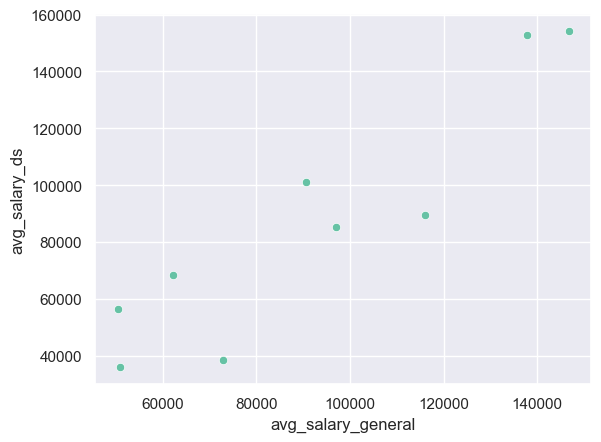

In [764]:
sns.scatterplot(data=merged_salaries, x = 'avg_salary_general', y = 'avg_salary_ds')

 Вывод: график иллюстрирует сильную прямую корреляцию, но данных слишком мало, чтобы визуализация была информативной. 

Ответим на вопрос агенства о том, есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании.

Нулевая гипотеза: должность и размер компании независимы.
Альтернативная: распределение должностей зависит от размера компании.

In [814]:
data_ds_de = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

job_title_crosstab = pd.crosstab(data_ds_de['company_size'], data_ds_de['job_title'])

print(job_title_crosstab)

chi2, p_value, dof, expected = chi2_contingency(job_title_crosstab)

print(f"\nChi-squared Test: p-value = {p_value:.3f}")

if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



job_title     Data Engineer  Data Scientist
company_size                               
L                        34              43
M                        81              66
S                         6              21

Chi-squared Test: p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: распределение должностей зависит от размера комапнии.

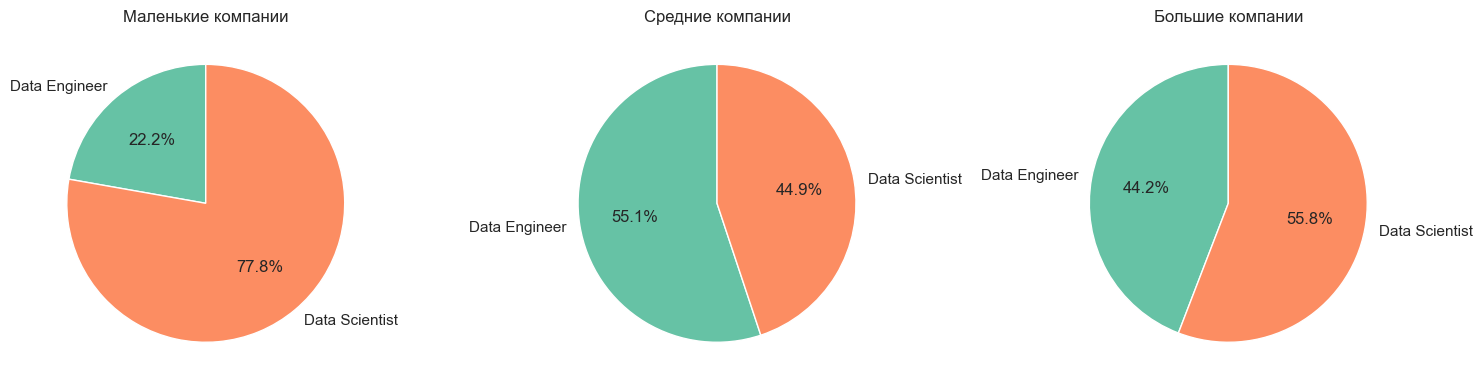

In [819]:
# Визуализируем распределение 

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

sizes_s = job_title_crosstab.loc['S']
axes[0].pie(sizes_s, labels=sizes_s.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Маленькие компании')

sizes_m = job_title_crosstab.loc['M']
axes[1].pie(sizes_m, labels=sizes_m.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Средние компании')

sizes_l = job_title_crosstab.loc['L']
axes[2].pie(sizes_l, labels=sizes_l.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Большие компании')


plt.tight_layout()
plt.show()




Вывод: в маленких компаниях количество дата сайентистов примерно в три с половиной раза выше количества дата инженеров. Это может быть связано с тем, что маленькие компании приотизируют быстрый рост, инновации и повышение удовлетворенности покупателей. У них часто нет такого большого объема даты, для структурирования и хранения которого нужны дата инженеры. В средних и больших компаниях распределение дата сайентистов и инженеров примерно одинаковое. Хотя в нашем датасете мы видим незначительную ю разницу: в средних компаниях инженеров примерно на 10% больше, а в больших примерно на 10% больше дата сайентистов.

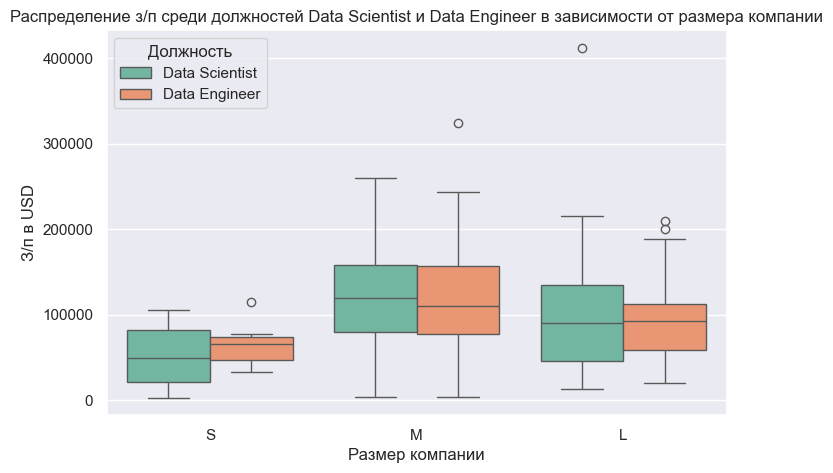

In [821]:
# Посмотрим на визуализацию распределения зарплат между этими двумя должностями в компаниях различных размеров.
plt.figure(figsize=(8, 5))

ax = sns.boxplot(data_ds_de, x='company_size', y='salary_in_usd', hue='job_title', order=company_size_order)
ax.set_title('Распределение з/п среди должностей Data Scientist и Data Engineer в зависимости от размера компании')
ax.set_xlabel('Размер компании')
ax.set_ylabel('З/п в USD')
ax.legend(title = 'Должность')



Вывод: распределение зарплат выглядит примерно одинаковым в средних и больших компаниях, но не совсем очевидным в маленьких

Поскольку относительное распределение специалистов в маленькох компаниях предполагает, что они отдают предпочтение дата сайентистам, проведем статистическую проверку и узнаем, отражается ли это на з/п.

Нулевая гипотеза: в маленьких компаниях з/п дата сайентистов равна з/п дата инженеров.
Альтернативная: в маленьких компаниях з/п дата сайентистов отличается от з/п дата инженеров.

In [827]:
ds_salary_small = data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == "S")]
de_salary_small = data[(data['job_title'] == 'Data Engineer') & (data['company_size'] == "S")]

# проводим тест Шапиро-Уилка
print('Для ds:')
result = stats.shapiro(ds_salary_small['salary_in_usd'])
decision_normality(result[1])

print('Для de:')
result = stats.shapiro(de_salary_small['salary_in_usd'])
decision_normality(result[1])

# оба распределения явлаются нормальными; проведем двухвыборочный t-критерий
# проводим тест Левена на равенство дисперсий
print('\nТест на равенство дисперсий')
result = stats.levene(ds_salary_small['salary_in_usd'], de_salary_small['salary_in_usd'])
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')
    
#дисперсии одинаковы

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(ds_salary_small['salary_in_usd'], de_salary_small['salary_in_usd'], alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

 

Для ds:
p-value = 0.18902742862701416
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для de:
p-value = 0.6062138080596924
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.

Тест на равенство дисперсий
p-value = 0.348
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.173
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: между з/п дата сайентистов и дата инженеров в маленких компаниях (как и в компаниях других размеров) нет статистически значимой разницы. 

#### 9. Посмотрим на распределение з/п в зависимости от типа занятости.

Text(0.5, 1.0, 'З/п, тип занятости и размер компании')

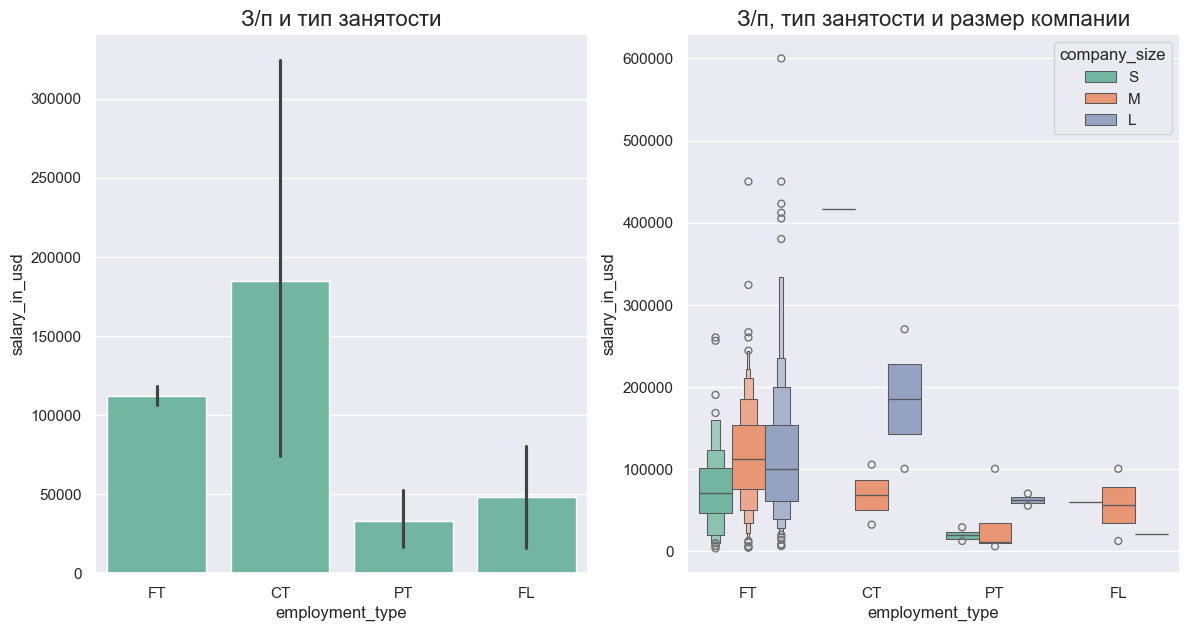

In [854]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(data, x='employment_type', y='salary_in_usd')
ax.set_title('З/п и тип занятости', fontdict={'fontsize': 16})

#добавим разрез по признаку размера компании
plt.subplot(1, 2, 2)
ax = sns.boxenplot(data, x='employment_type', y='salary_in_usd', hue='company_size', hue_order=company_size_order)
ax.set_title('З/п, тип занятости и размер компании', fontdict={'fontsize': 16})

Вывод: самая большая средняя з/п у специалистов с типом занятости по контракту. Интересен очень высокий показатель з/п по контракту в маленьких компаниях — в разы больше, чем в компаниях другого размера. Показатель зарплаты для людей на контракте также высок в больших компаниях, а вот в средних компаниях з/п специалистов по контракту в среднем меньше, чем специалистов на полной занятости. На втором месте по размеру з/п специалисты с полной занятостью, причем чем больше компания — тем выше максимальные показатели з/п. У фрилансеров и специалистов с частичной занятостью з/п самые низкие и в среднем почти не отличаются друг от друга. При этом самые высокие показатели з/п у фрилансеров и у частично занятых наблюдаются в компаниях среднего размера — этот показатель примерно одинаковый для фрилансеров, частично занятых и специалистов по контракту. 

Посмотрим, как распределен тип занятости среди специалистов с разным опытом.

Text(0.5, 1.0, 'З/п, тип занятости и опыт сотрудника')

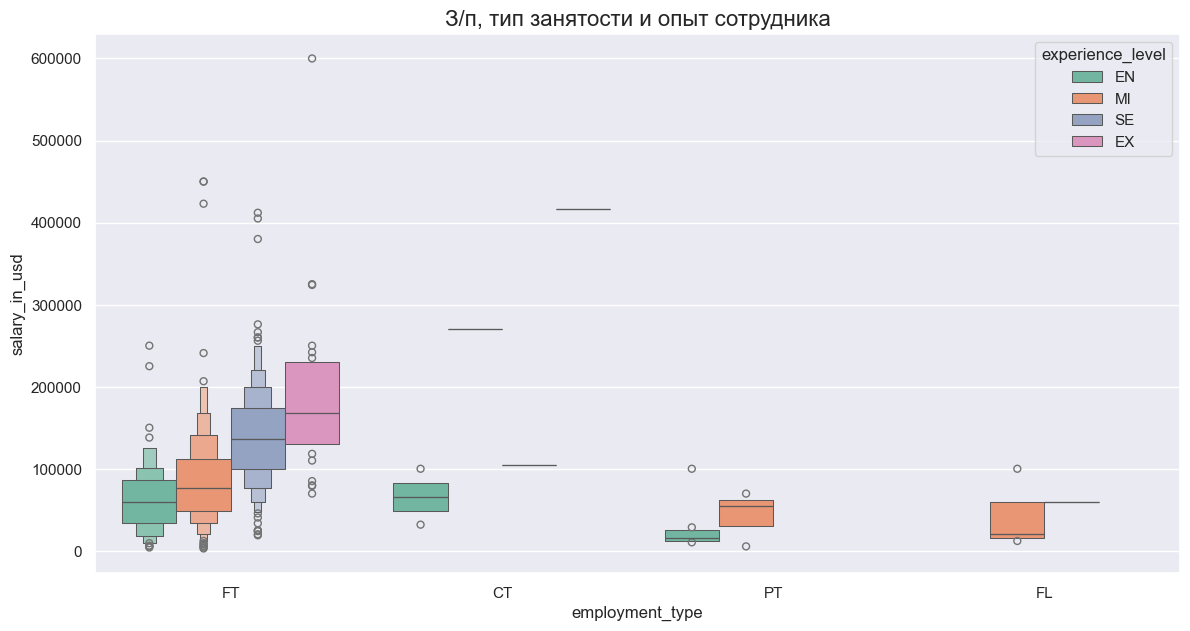

In [856]:
plt.figure(figsize=(14, 7))
ax = sns.boxenplot(data, x='employment_type', y='salary_in_usd', hue='experience_level', hue_order = ['EN', 'MI', 'SE', 'EX'])
ax.set_title('З/п, тип занятости и опыт сотрудника', fontdict={'fontsize': 16})

Вывод: любопытно, что очевидная "лесенка" роста з/п с повышением опытоа работы наблюдается только у специалистов с полной занятостью. Среди специалистов по контракту разброс совсем неочевудный (но и быборка очевидно очень мала), а среди работников с частичноч занятостью и фриланс проситствуют только по две из четырех категорий опыта (Entry и Middle; Middle и Senior соответственно).

#### 10. Посмотрим на признак типа работы

Text(0.5, 1.0, 'З/п, тип работы и тип занятости.')

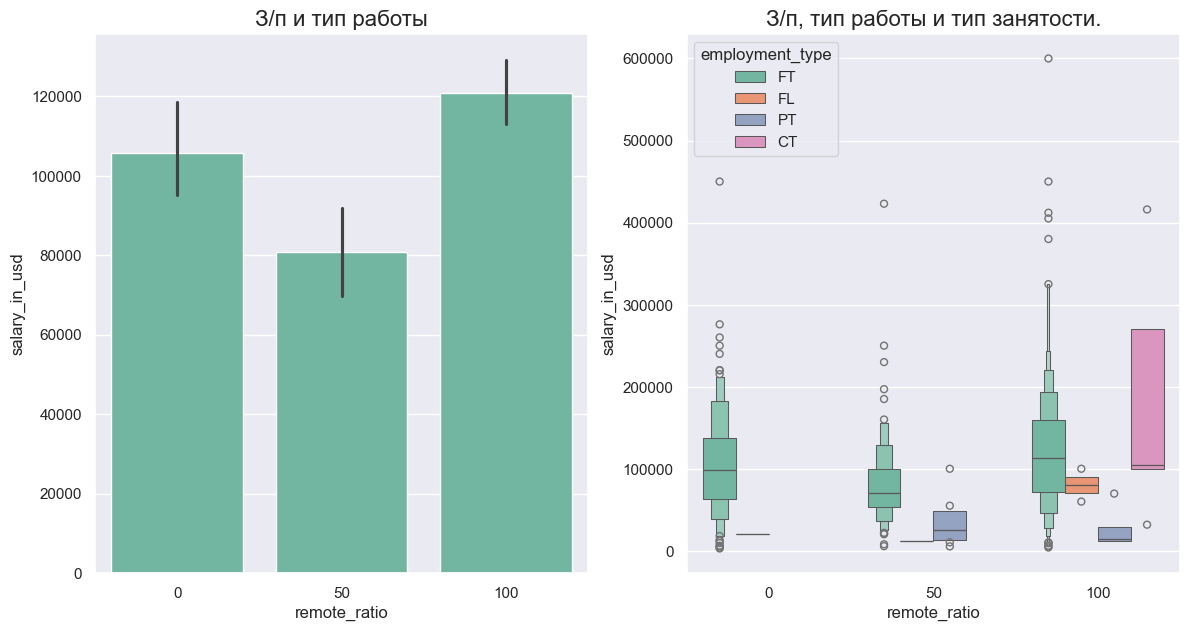

In [884]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(data, x='remote_ratio', y='salary_in_usd')
ax.set_title('З/п и тип работы', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.boxenplot(data, x='remote_ratio', y='salary_in_usd', hue='employment_type')
ax.set_title('З/п, тип работы и тип занятости.', fontdict={'fontsize': 16})

***Очень жаль, что в датасете нет информации о поле сотрудника. Это очень важный показатель для понимания факторов, влияющих на распределение зарплат. 